In [65]:
#imports
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt
#soccer plots radar plot
from soccerplots.radar_chart import Radar

from sklearn.cluster import KMeans
import seaborn as sns

In [93]:
df1 = pd.read_excel("LP_Player_Shooting_Stats.xlsx")
df2 = pd.read_excel("LP_Player_Passing_Stats.xlsx")
df3 = pd.read_excel("LP_Player_SGA_Stats.xlsx")
df4 = pd.read_excel("LP_Player_Aerial_Stats.xlsx")
df5 = pd.read_excel("LP_Player_Pos_Stats.xlsx")
df6 = pd.read_excel("LP_Player_DA_Stats.xlsx")

In [94]:
#drop overlapping columns
df2.drop(columns=['Nation','Pos','Age','Born','90s'], inplace=True)
df3.drop(columns=['Pos','Age','Born','90s'], inplace=True)
df5.drop(columns=['Pos','Age','Born','90s'], inplace=True)
df6.drop(columns=['Nation','Pos','Age','Born','90s'], inplace=True)

In [95]:
df = pd.merge(df1, df2, on=['Player','Squad'], how='left')
df = pd.merge(df, df3, on=['Player','Squad'], how='left')
df = pd.merge(df, df4, on=['Player','Squad'], how='left')
df = pd.merge(df, df5, on=['Player','Squad'], how='left')
df = pd.merge(df, df6, on=['Player','Squad'], how='left')

In [97]:
#players that played at least 270 min and are defenders
df = df.loc[(df['Pos']=='FW') & (df['90s']>=3)|(df['Pos']=='FW,MF') & (df['90s']>=3)]

In [99]:
df.shape

(84, 97)

In [100]:
#Drop irrevelant columns
df_df = df.drop(['Nation','Pos','Squad','Age','Born'],axis=1).reset_index()

In [101]:
df_df = df_df.drop(['index'],axis=1)

In [102]:
df_df.head()

Player  90s   Gls    Sh   SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT  \
0    Issah Abbas  4.1  0.00  2.44  0.98  40.0   2.41    0.97  0.00   0.00   
1  Salvador Agra  6.4  0.16  0.78  0.16  20.0   0.78    0.16  0.20   1.00   
2         Allano  5.4  0.19  0.93  0.37  40.0   0.93    0.37  0.00   0.00   
3       Anderson  9.6  0.21  3.54  1.35  38.2   3.54    1.35  0.06   0.15   
4       Anderson  4.2  0.00  2.14  0.71  33.3   2.15    0.72  0.00   0.00   

   ...   Att  Tkl%  Dribbled Past  Blocks  Blocked Shots  Blocked Pass   Int  \
0  ...  0.73  33.3           0.49    0.73           0.00          0.73  0.49   
1  ...  0.78   0.0           0.78    0.16           0.16          0.00  0.31   
2  ...  2.78  20.0           2.22    1.85           0.19          1.67  0.56   
3  ...  0.21  50.0           0.10    0.63           0.00          0.63  0.10   
4  ...  1.43  16.7           1.19    1.19           0.00          1.19  0.00   

   Tkl+Int   Clr  Err  
0     1.71  0.24  0.0  
1     0.94  0.31  0.0  
2     1.48  1.11  0.0  
3     0.52  1.35  0.0  
4     0.48  0.24  0.0  

[5 rows x 92 columns]

In [103]:
#Check columns
df_df.columns

Index(['Player', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh',
       'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG',
       'np:G-xG', 'Total Cmp', 'Total Att', 'Total Cmp%', 'TotDist', 'PrgDist',
       'Short Cmp', 'Short Att', 'Short Cmp%', 'Medium Cmp', 'Medium Att',
       'Medium Cmp%', 'Long Cmp', 'Long Att', 'Long Cmp%', 'Ast', 'xAG', 'xA',
       'A-xAG', 'KP', 'Passes into final third', 'PPA', 'CrsPA', 'Prog', 'SCA',
       'SCA90', 'SCA PassLive', 'SCA PassDead', 'SCA Drib', 'SCA Sh',
       'SCA Fld', 'SCA Def', 'GCA', 'GCA90', 'GCA PassLive', 'GCA PassDead',
       'GCA Drib', 'GCA Sh', 'GCA Fld', 'GCA Def', 'Recov', 'Aerial Won',
       'Aerial Lost', 'Aerial Won%', 'Rk', 'Touches', 'Def Pen',
       'Touches Def 3rd', 'Touches Mid 3rd', 'Touches Att 3rd',
       'Touches Att Pen', 'Dribbles Succ', 'Dribbles Att', 'Dribbles Succ%',
       'Dribbles Mis', 'Dribbles Dis', 'Rec', 'Prog Passed Received', 'Tkl',
       'TklW', 'Tkl Def 3

In [104]:
df_df.shape

(84, 92)

In [105]:
#Check variable stats
df_df.describe()

90s        Gls         Sh        SoT       SoT%      Sh/90  \
count  84.000000  84.000000  84.000000  84.000000  84.000000  84.000000   
mean    7.223810   0.262857   2.338095   0.864286  37.819048   2.339881   
std     2.894724   0.213511   0.989951   0.435293  13.898188   0.993242   
min     3.100000   0.000000   0.400000   0.000000   0.000000   0.400000   
25%     4.575000   0.110000   1.747500   0.567500  28.600000   1.750000   
50%     6.850000   0.225000   2.295000   0.810000  35.500000   2.295000   
75%     9.325000   0.387500   2.925000   1.090000  46.225000   2.935000   
max    13.700000   0.910000   5.000000   2.380000  66.700000   4.970000   

          SoT/90       G/Sh      G/SoT       Dist  ...        Att        Tkl%  \
count  84.000000  84.000000  83.000000  83.000000  ...  83.000000   82.000000   
mean    0.864643   0.106429   0.275783  17.538554  ...   1.128916   36.881707   
std     0.436195   0.084492   0.206392   3.683345  ...   0.705026   23.067245   
min     0.000000   0.000000   0.000000   8.700000  ...   0.000000    0.000000   
25%     0.567500   0.050000   0.140000  15.150000  ...   0.620000   20.550000   
50%     0.810000   0.100000   0.290000  17.600000  ...   1.050000   33.300000   
75%     1.090000   0.170000   0.400000  19.750000  ...   1.460000   50.000000   
max     2.370000   0.330000   1.000000  29.100000  ...   3.570000  100.000000   

       Dribbled Past     Blocks  Blocked Shots  Blocked Pass        Int  \
count      83.000000  83.000000      83.000000     83.000000  84.000000   
mean        0.692651   0.803012       0.087590      0.715181   0.383571   
std         0.459454   0.487069       0.113617      0.487163   0.296289   
min         0.000000   0.000000       0.000000      0.000000   0.000000   
25%         0.360000   0.510000       0.000000      0.370000   0.190000   
50%         0.630000   0.700000       0.000000      0.650000   0.315000   
75%         0.925000   1.050000       0.170000      0.895000   0.560000   
max         2.220000   2.730000       0.440000      2.420000   1.570000   

         Tkl+Int        Clr        Err  
count  83.000000  83.000000  83.000000  
mean    1.466867   0.649398   0.005663  
std     0.781829   0.477362   0.029681  
min     0.130000   0.000000   0.000000  
25%     0.875000   0.315000   0.000000  
50%     1.330000   0.540000   0.000000  
75%     2.095000   0.905000   0.000000  
max     3.520000   2.450000   0.180000  

[8 rows x 91 columns]

In [106]:
#check variable types
df_df.dtypes

Player           object
90s             float64
Gls             float64
Sh              float64
SoT             float64
                 ...   
Blocked Pass    float64
Int             float64
Tkl+Int         float64
Clr             float64
Err             float64
Length: 92, dtype: object

In [107]:
#Duplicates
duplicates = df_df['Player'].duplicated()
num_duplicates = duplicates.sum()
print(num_duplicates)

1


In [108]:
#Check NaN
nan_count = df_df.isna().sum().sum()

# Print the number of NaN values
print("Number of NaN values:", nan_count)

Number of NaN values: 79


In [109]:
# Count the number of NaN values in each row
nan_counts = df_df.isna().sum(axis=1)

# Count the number of rows with only one NaN value
one_nan_count = (nan_counts > 0 ).sum()
one_nan_rows = df_df[nan_counts > 0]


# Print the number of rows with only one NaN value
print("Number of rows with more than one NaN value:", one_nan_count)

Number of rows with more than one NaN value: 4


In [110]:
# Print the rows with only one NaN value
one_nan_rows

Player  90s   Gls    Sh   SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT  \
23     Oday Dabbagh  4.5  0.44  1.33  0.89  66.7   1.33    0.89  0.33    0.5   
32  Diogo Gonçalves  3.4  0.00  4.41  1.47  33.3   4.47    1.49  0.00    0.0   
71   Bernardo Sousa  4.5  0.00  0.67  0.00   0.0   0.67    0.00  0.00    NaN   
82          Zarzana  3.2  0.00  1.56  0.31  20.0   1.56    0.31  0.00    0.0   

    ...   Att  Tkl%  Dribbled Past  Blocks  Blocked Shots  Blocked Pass   Int  \
23  ...  0.00   NaN           0.00    0.89            0.0          0.89  0.89   
32  ...  1.18  50.0           0.59    1.18            0.0          1.18  0.29   
71  ...  1.11  20.0           0.89    1.78            0.0          1.78  0.22   
82  ...   NaN   NaN            NaN     NaN            NaN           NaN  0.63   

    Tkl+Int   Clr  Err  
23     1.33  0.89  0.0  
32     2.06  0.29  0.0  
71     1.11  1.11  0.0  
82      NaN   NaN  NaN  

[4 rows x 92 columns]

In [111]:
#Drop NaN
df_df = df_df.dropna()

In [112]:
nan_count = df_df.isna().sum().sum()

# Print the number of NaN values
print("Number of NaN values:", nan_count)

Number of NaN values: 0


In [113]:
#Chosing the variables based on literature and personal opinion
df_df.columns

Index(['Player', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh',
       'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG',
       'np:G-xG', 'Total Cmp', 'Total Att', 'Total Cmp%', 'TotDist', 'PrgDist',
       'Short Cmp', 'Short Att', 'Short Cmp%', 'Medium Cmp', 'Medium Att',
       'Medium Cmp%', 'Long Cmp', 'Long Att', 'Long Cmp%', 'Ast', 'xAG', 'xA',
       'A-xAG', 'KP', 'Passes into final third', 'PPA', 'CrsPA', 'Prog', 'SCA',
       'SCA90', 'SCA PassLive', 'SCA PassDead', 'SCA Drib', 'SCA Sh',
       'SCA Fld', 'SCA Def', 'GCA', 'GCA90', 'GCA PassLive', 'GCA PassDead',
       'GCA Drib', 'GCA Sh', 'GCA Fld', 'GCA Def', 'Recov', 'Aerial Won',
       'Aerial Lost', 'Aerial Won%', 'Rk', 'Touches', 'Def Pen',
       'Touches Def 3rd', 'Touches Mid 3rd', 'Touches Att 3rd',
       'Touches Att Pen', 'Dribbles Succ', 'Dribbles Att', 'Dribbles Succ%',
       'Dribbles Mis', 'Dribbles Dis', 'Rec', 'Prog Passed Received', 'Tkl',
       'TklW', 'Tkl Def 3

### Variables to keep according to stats bomb: 
- xG, xA, SCA, Touches in box, xG Assisted, Pressures regains, Pressures, Aerial Wins, Turnovers, Suc Dribbles, x G/shot, SoT%

### Additional Variables to keep according to Driblab:
- Suc Dribbles %, Dispossed, % Passing, % Ball Retention, KP, Short Passes Successfull, PPA

In [114]:
df_df = df_df.drop(['G/Sh', 'G/SoT','90s', 'Gls', 'Sh','Sh/90', 'SoT/90', 'Dist', 'FK', 'PK', 'PKatt','G-xG','np:G-xG','Total Cmp', 'Total Att','TotDist', 'PrgDist','Short Att', 
                    'Short Cmp%', 'Medium Cmp', 'Medium Att','Medium Cmp%', 'Long Cmp',
                    'Long Att', 'Long Cmp%', 'Ast','A-xAG','CrsPA','Prog','SCA90','SCA PassLive', 'SCA PassDead', 'SCA Drib', 'SCA Sh',
       'SCA Fld', 'SCA Def','GCA90', 'GCA PassLive', 'GCA PassDead',
       'GCA Drib', 'GCA Sh', 'GCA Fld', 'GCA Def','Aerial Won%','Aerial Lost','Rk','Touches', 'Def Pen',
       'Touches Def 3rd', 'Touches Mid 3rd','Dribbles Att','Rec','Tkl','Tkl Def 3rd', 'Tkl Mid 3rd','Tkl vs Dribbles',
       'Att', 'Tkl%', 'Dribbled Past', 'Blocks', 'Blocked Shots',
       'Blocked Pass', 'Int', 'Tkl+Int', 'Clr', 'Err'],axis=1)

In [115]:
df_df.columns

Index(['Player', 'SoT', 'SoT%', 'xG', 'npxG', 'npxG/Sh', 'Total Cmp%',
       'Short Cmp', 'xAG', 'xA', 'KP', 'Passes into final third', 'PPA', 'SCA',
       'GCA', 'Recov', 'Aerial Won', 'Touches Att 3rd', 'Touches Att Pen',
       'Dribbles Succ', 'Dribbles Succ%', 'Dribbles Mis', 'Dribbles Dis',
       'Prog Passed Received', 'TklW', 'Tkl Att 3rd'],
      dtype='object')

In [116]:
df_df.shape

(80, 26)

In [117]:
#define params
params = list(df_df.columns)
print(params)
params = params[1:]

['Player', 'SoT', 'SoT%', 'xG', 'npxG', 'npxG/Sh', 'Total Cmp%', 'Short Cmp', 'xAG', 'xA', 'KP', 'Passes into final third', 'PPA', 'SCA', 'GCA', 'Recov', 'Aerial Won', 'Touches Att 3rd', 'Touches Att Pen', 'Dribbles Succ', 'Dribbles Succ%', 'Dribbles Mis', 'Dribbles Dis', 'Prog Passed Received', 'TklW', 'Tkl Att 3rd']


In [118]:
df_df['Player'].unique

<bound method Series.unique of 0           Issah Abbas
1         Salvador Agra
2                Allano
3              Anderson
4              Anderson
            ...        
78      Kevin Villodres
79              Vitinha
80                Xadas
81    Abdul-Aziz Yakubu
83           Kévin Zohi
Name: Player, Length: 80, dtype: object>

# Pizza Chart

In [119]:
#First Player
player_1 = df_df.loc[df_df['Player']=='Paulinho'].reset_index()
player_1 = list(player_1.loc[0])
player_1 = player_1[2:]

In [122]:
player_2 = df_df.loc[df_df['Player']=='Fran Navarro'].reset_index()
player_2 = list(player_2.loc[0])
player_2 = player_2[2:]

In [131]:
player_3 = df_df.loc[df_df['Player']=='Gonçalo Ramos'].reset_index()
player_3 = list(player_3.loc[0])
player_3 = player_3[2:]

In [133]:
player_4 = df_df.loc[df_df['Player']=='Mehdi Taremi'].reset_index()
player_4 = list(player_4.loc[0])
player_4 = player_4[2:]

In [123]:
#calculate percentile
values_1 = []
for x in range(len(params)):
        values_1.append(math.floor(stats.percentileofscore(df_df[params[x]],player_1[x])))

In [124]:
values_2 = []
for x in range(len(params)):
        values_2.append(math.floor(stats.percentileofscore(df_df[params[x]],player_2[x])))

In [134]:
values_3 = []
for x in range(len(params)):
        values_3.append(math.floor(stats.percentileofscore(df_df[params[x]],player_3[x])))

In [135]:
values_4 = []
for x in range(len(params)):
        values_4.append(math.floor(stats.percentileofscore(df_df[params[x]],player_4[x])))

In [136]:
#pizza plot
# instantiate PyPizza class
def pizza_plot(x,y,z,c):
    baker = PyPizza(
        params=y,                  # list of parameters
        straight_line_color="#000000",  # color for straight lines
        straight_line_lw=1,             # linewidth for straight lines
        last_circle_lw=1,               # linewidth of last circle
        other_circle_lw=1,              # linewidth for other circles
        other_circle_ls="-."            # linestyle for other circles
    )

    # plot pizza
    fig, ax = baker.make_pizza(
        x,              # list of values
        figsize=(13, 13),      # adjust figsize according to your need
        param_location=110,  # where the parameters will be added
        kwargs_slices=dict(
            facecolor=f"{c}", edgecolor="#000000",
            zorder=2, linewidth=1
        ),                   # values to be used when plotting slices
        kwargs_params=dict(
            color="#000000", fontsize=11, va="center"
        ),                   # values to be used when adding parameter
        kwargs_values=dict(
            color="white", fontsize=12, zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor=f"{c}",
                boxstyle="round,pad=0.2", lw=1
            )
        )                    # values to be used when adding parameter-values
    )

    # add title
    fig.text(
        0.515, 0.97, f"{z}", size=18,
        ha="center", color="#000000"
    )

    # add subtitle
    fig.text(
        0.515, 0.942,
        "Per 90s Percentile Rank vs Liga Portuguesa Attackers| Season 2022-23",
        size=15,
        ha="center",  color="#000000"
    )

    # add credits
    CREDIT_1 = "data: fbref"
    CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

    fig.text(
        0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9, color="#000000",
        ha="right"
    )

    plt.show()

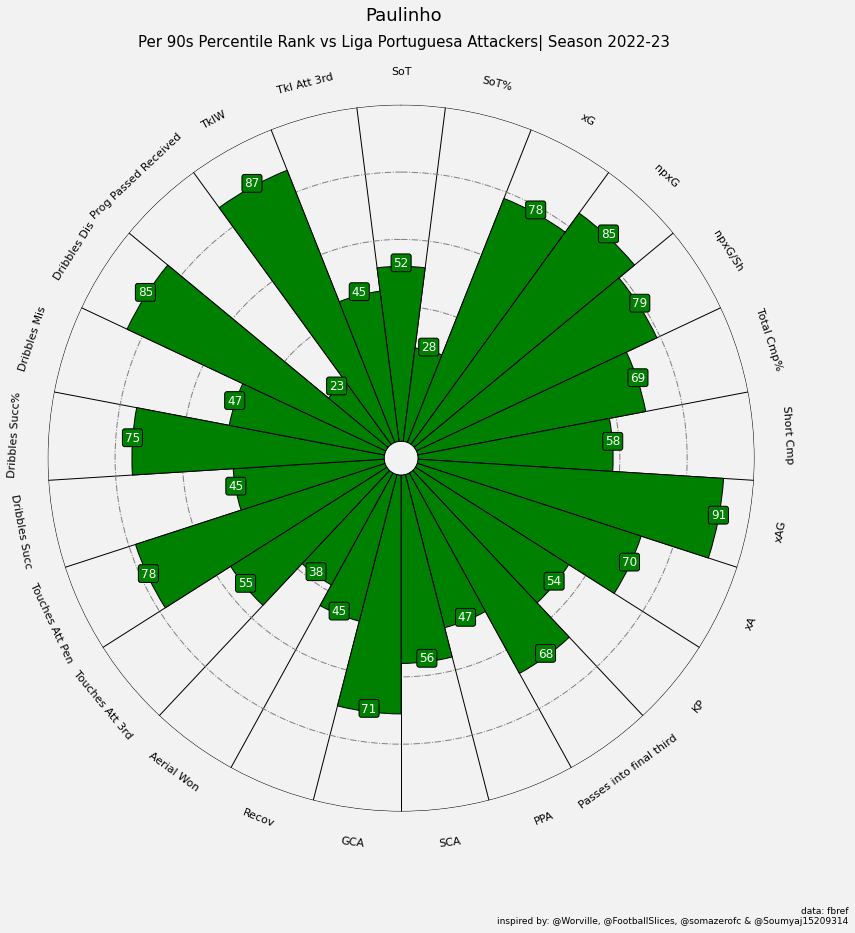

In [137]:
pizza_plot(values_1,params,z='Paulinho',c="green")

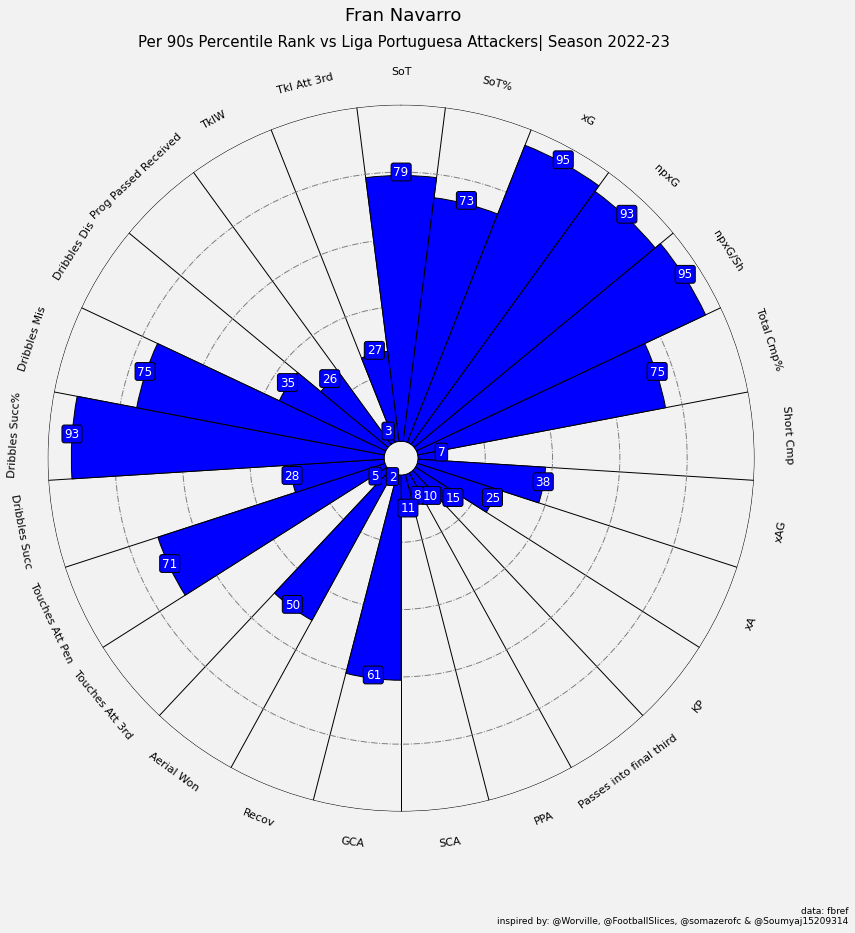

In [138]:
pizza_plot(values_2,params,z='Fran Navarro',c="blue")

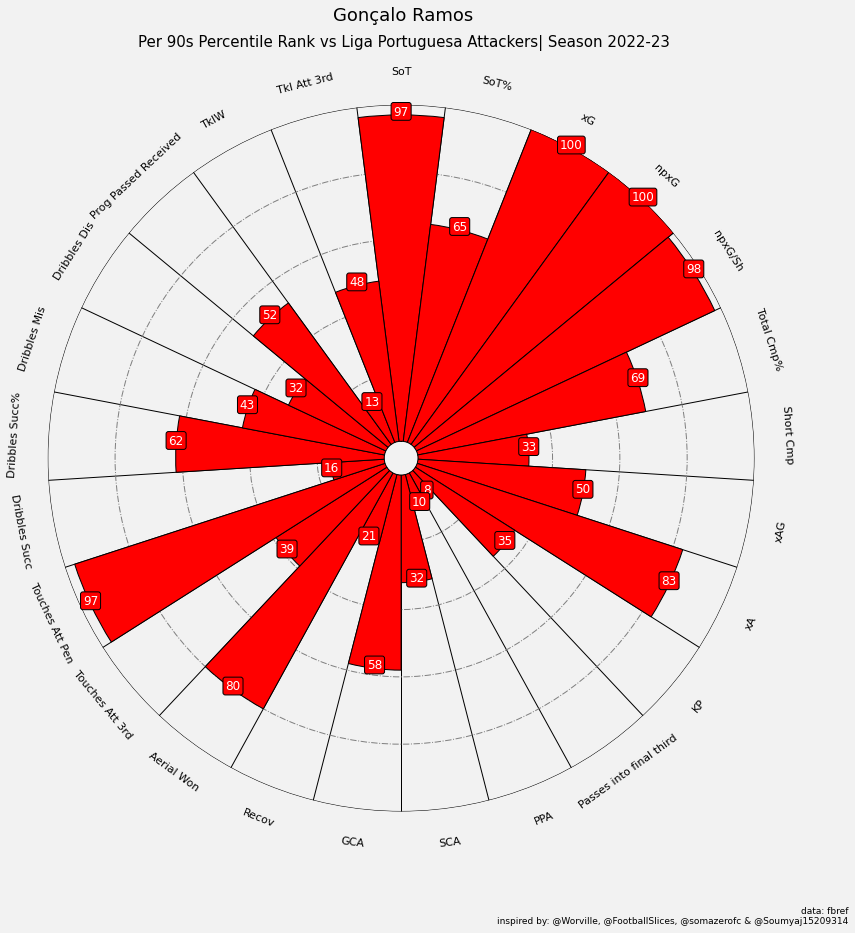

In [139]:
pizza_plot(values_3,params,z='Gonçalo Ramos',c="red")

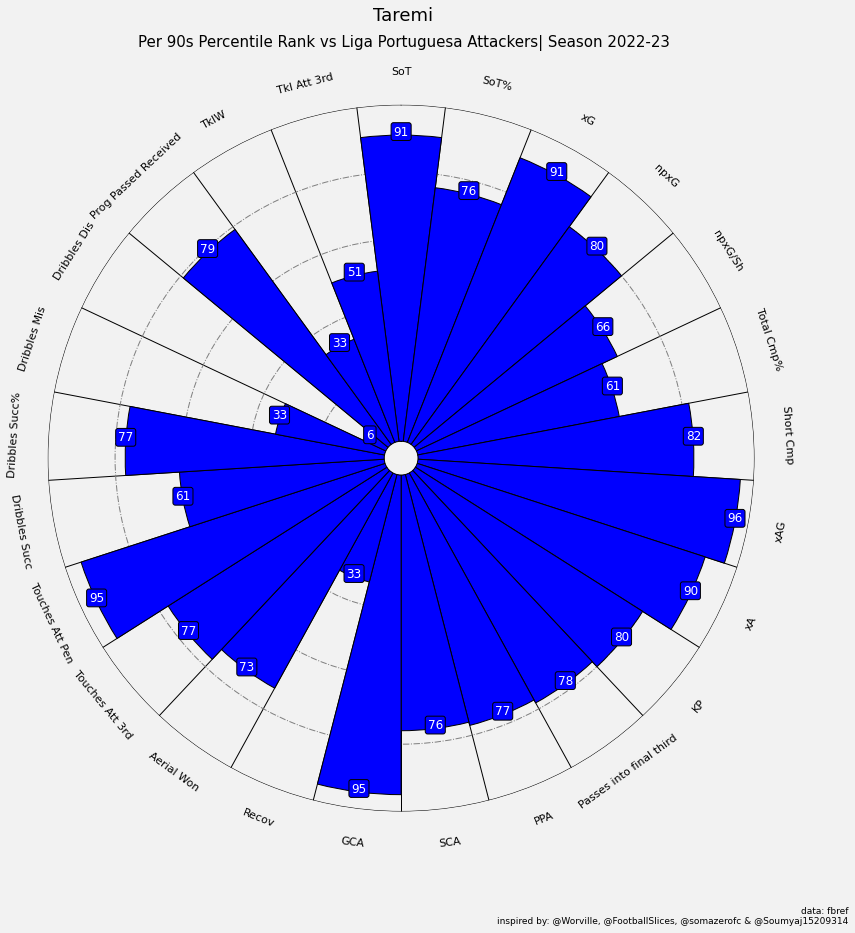

In [140]:
pizza_plot(values_4,params,z='Taremi',c="blue")

# Radar Charts

In [141]:
df_radar = df_df[(df_df['Player']=='Paulinho')|(df_df['Player']=='Fran Navarro')]

In [142]:
df_radar = df_radar.reset_index()

In [143]:
df_radar=df_radar.drop(['index'],axis=1)

In [144]:
#Params
#Already defined above
params

['SoT',
 'SoT%',
 'xG',
 'npxG',
 'npxG/Sh',
 'Total Cmp%',
 'Short Cmp',
 'xAG',
 'xA',
 'KP',
 'Passes into final third',
 'PPA',
 'SCA',
 'GCA',
 'Recov',
 'Aerial Won',
 'Touches Att 3rd',
 'Touches Att Pen',
 'Dribbles Succ',
 'Dribbles Succ%',
 'Dribbles Mis',
 'Dribbles Dis',
 'Prog Passed Received',
 'TklW',
 'Tkl Att 3rd']

In [145]:
#add ranges to list of tuple pairs
ranges=[]
a_values = []
b_values = []
player_a ='Paulinho'
player_b ='Fran Navarro'

for x in params:
    a = min(df[params][x])
    a = a - (a*.25)
    
    b = max(df[params][x])
    b = b +(b*.25)
    
    ranges.append((a,b))

for x in range(len(df_radar['Player'])):
    if  df_radar['Player'][x] == player_a:
        a_values = df_radar.iloc[x].values.tolist()
    if  df_radar['Player'][x] == player_b:
        b_values = df_radar.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values_radar = [a_values,b_values]

In [148]:
#Radar plot title

title = dict(
    title_name = f'{player_a}',
    title_color = 'green',
    subtitle_name = 'Sporting',
    subtitle_color = 'green',
    title_name_2 = f'{player_b}',
    title_color_2 = 'blue',
    subtitle_name_2 = 'Gil Vicente',
    subtitle_color_2 = 'blue',
    title_fontsize= 18,
    subtitle_fontsize = 11
)

endnote = 'Gonçalo Rosado \ndata via FBREF'

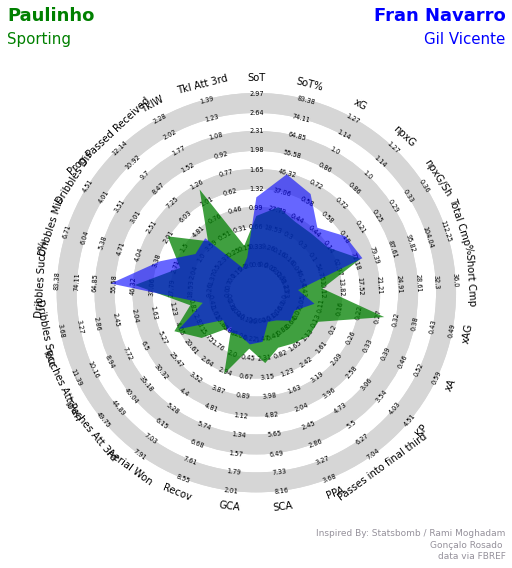

In [150]:
#radar
radar = Radar()

fig,ax = radar.plot_radar(ranges= ranges, params=params, values=values_radar, radar_color=['green','blue'],alphas=[.75,.6],title=title,endnote=endnote,compare=True)

# Clustering Project

In [187]:
df_clus = df_df.drop(['Player'],axis=1)

In [188]:
#scale
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(df_clus)

# Transform the data
df_standardized = scaler.transform(df_clus)

In [189]:
#PCA
from sklearn.decomposition import PCA

Text(0, 0.5, 'Explained variance ratio')

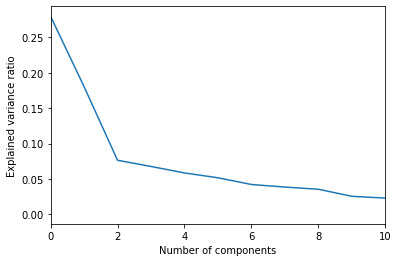

In [190]:
# Apply PCA to the data and compute the explained variance ratio
pca = PCA()
pca.fit(df_standardized)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.plot(explained_variance_ratio)
plt.xlim(0, 10)
plt.xlabel("Number of components")
plt.ylabel("Explained variance ratio")

In [232]:
#explained variance
# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative sum of explained variance ratio
cumulative_sum = np.cumsum(explained_variance_ratio)

# Select the number of components that explain at least 95% of the variance
n_components = np.where(cumulative_sum > 0.60)[0][0] + 1
print(f"Number of components that explain 60% of the variance: {n_components}")

Number of components that explain 60% of the variance: 4


In [293]:
pca = PCA(n_components=4,random_state=42)
pca.fit(df_standardized)
# Get the PCs
pcs = pca.transform(df_standardized)

[Text(0, 0.5, 'Chance Creation'),
 Text(0, 1.5, 'Finishing'),
 Text(0, 2.5, 'Pressing'),
 Text(0, 3.5, 'Aerial Work')]

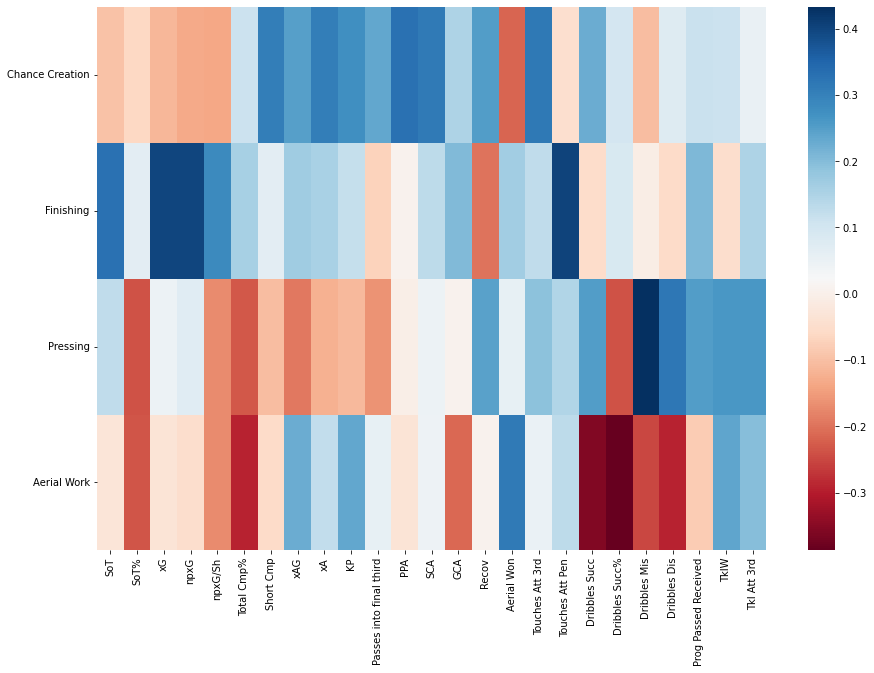

In [294]:
#create a heatmap
# Get the loadings
loadings = pca.components_

# Create a DataFrame of the loadings
loadings_df = pd.DataFrame(loadings, columns=df_clus.columns)

# Rename the rows
loadings_df.rename(index={0: 'Chance Creation',
                      1: 'Finishing',
                      2: 'Pressing',3:'Aerial Work'}, inplace=True)

plt.figure(figsize=(15, 10))
ax = sns.heatmap(loadings_df, cmap='RdBu')
# Rotate the y-axis labels by 90 degrees
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")

In [233]:
# Create a DataFrame of the PCs
pcs_df = pd.DataFrame(pcs, columns=['Chance Creation','Finishing','Pressing','Aerial Work'])
pcs_df

Chance Creation  Finishing  Pressing  Aerial Work
0         -0.112342  -0.002000 -0.515551     0.762213
1          1.337521  -2.057505 -1.891170     0.551484
2          1.456913  -2.574992  1.241936    -0.854076
3         -3.431532  -0.721220  0.380818    -0.880186
4          3.186604  -1.238655 -0.715620    -0.930476
..              ...        ...       ...          ...
75         3.868734  -1.151499  3.272851     0.497797
76        -0.173233   2.987518  2.684048    -1.386917
77         3.037118  -0.820814 -1.373987     2.290749
78        -2.253544  -0.794672 -1.498500    -0.754951
79         0.282591  -0.294312  0.416209     0.569742

[80 rows x 4 columns]

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8468228790>
Traceback (most recent call last):
  File "/home/big/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/big/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/big/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/big/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_modul

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8468228790>
Traceback (most recent call last):
  File "/home/big/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/big/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/big/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/big/miniconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


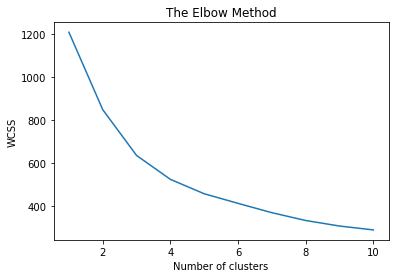

In [234]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(pcs_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# 4 clusters

In [235]:
from sklearn.metrics import silhouette_score

# Create an empty list to store the silhouette scores
silhouette_scores = []

# Iterate over different number of clusters
for n_clusters in range(2, 11):
    # Create an instance of KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pcs_df)
    # Get the labels of the clusters
    labels = kmeans.labels_
    # Calculate the silhouette score for the current number of clusters
    silhouette_score_ = silhouette_score(pcs_df, labels)
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_score_)

# Find the number of clusters that results in the highest silhouette score
best_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("The optimal number of clusters is:", best_n_clusters)

The optimal number of clusters is: 4


In [236]:
#Kmenas clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(pcs_df)

# Get the cluster assignments for each data point
labels = kmeans.labels_


In [237]:
labels

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 3, 3, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       3, 2, 0, 0, 0, 1, 0, 2, 0, 1, 3, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 1,
       2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1], dtype=int32)

In [238]:
df_viz = df_df.copy()

In [239]:
df_viz['label'] = labels

In [240]:
df_viz[df_viz['Player'] == 'Paulinho']

Player   SoT  SoT%    xG  npxG  npxG/Sh  Total Cmp%  Short Cmp   xAG  \
60  Paulinho  0.85  29.4  0.41  0.41     0.14        73.5       10.2  0.29   

      xA  ...  Touches Att 3rd  Touches Att Pen  Dribbles Succ  \
60  0.14  ...             17.1             4.41           0.85   

    Dribbles Succ%  Dribbles Mis  Dribbles Dis  Prog Passed Received  TklW  \
60            45.5          2.54          2.03                   3.9  1.19   

    Tkl Att 3rd  label  
60         0.17      1  

[1 rows x 27 columns]

In [241]:
df_viz[df_viz['Player'] == 'Fran Navarro']

Player   SoT  SoT%    xG  npxG  npxG/Sh  Total Cmp%  Short Cmp  \
54  Fran Navarro  1.17  45.7  0.64  0.47     0.18        74.3       5.47   

     xAG    xA  ...  Touches Att 3rd  Touches Att Pen  Dribbles Succ  \
54  0.09  0.05  ...             10.0             4.09           0.58   

    Dribbles Succ%  Dribbles Mis  Dribbles Dis  Prog Passed Received  TklW  \
54            57.1          3.28          1.17                  4.16   0.0   

    Tkl Att 3rd  label  
54         0.07      0  

[1 rows x 27 columns]

In [243]:
df_viz[df_viz['Player'] == 'Mehdi Taremi']

Player   SoT  SoT%    xG  npxG  npxG/Sh  Total Cmp%  Short Cmp  \
73  Mehdi Taremi  1.46  46.3  0.52  0.39     0.12        73.0       12.2   

     xAG    xA  ...  Touches Att 3rd  Touches Att Pen  Dribbles Succ  \
73  0.32  0.21  ...             21.2             6.69           1.23   

    Dribbles Succ%  Dribbles Mis  Dribbles Dis  Prog Passed Received  TklW  \
73            45.7          2.31          0.54                  5.85  0.31   

    Tkl Att 3rd  label  
73         0.23      2  

[1 rows x 27 columns]

In [244]:
df_viz[df_viz['Player'] == 'Vitinha']

Player   SoT  SoT%    xG  npxG  npxG/Sh  Total Cmp%  Short Cmp   xAG  \
79  Vitinha  1.57  38.1  0.49  0.49     0.12        68.9       6.96  0.13   

      xA  ...  Touches Att 3rd  Touches Att Pen  Dribbles Succ  \
79  0.08  ...             22.8             6.47           1.67   

    Dribbles Succ%  Dribbles Mis  Dribbles Dis  Prog Passed Received  TklW  \
79            39.5           4.8          1.96                  6.18  0.78   

    Tkl Att 3rd  label  
79         0.29      2  

[1 rows x 27 columns]

In [245]:
df_viz[df_viz['Player'] == 'Gonçalo Ramos']

Player   SoT  SoT%    xG  npxG  npxG/Sh  Total Cmp%  Short Cmp  \
62  Gonçalo Ramos  1.78  41.3  1.02  1.02     0.24        73.5        7.2   

     xAG    xA  ...  Touches Att 3rd  Touches Att Pen  Dribbles Succ  \
62  0.11  0.19  ...             16.0             7.29           0.47   

    Dribbles Succ%  Dribbles Mis  Dribbles Dis  Prog Passed Received  TklW  \
62            41.7          2.52          1.12                  4.86  0.19   

    Tkl Att 3rd  label  
62         0.19      2  

[1 rows x 27 columns]

In [306]:
df_viz[df_viz['label'] == 2]

Player   SoT  SoT%    xG  npxG  npxG/Sh  Total Cmp%  Short Cmp  \
27      Evanilson  0.95  33.3  0.83  0.83     0.29        77.8      11.30   
47  Toni Martínez  2.38  47.6  0.50  0.50     0.10        61.3       6.90   
53     Petar Musa  2.00  40.9  0.69  0.69     0.14        73.3      10.40   
62  Gonçalo Ramos  1.78  41.3  1.02  1.02     0.24        73.5       7.20   
68      Abel Ruiz  1.28  38.5  0.45  0.45     0.13        78.5      12.80   
73   Mehdi Taremi  1.46  46.3  0.52  0.39     0.12        73.0      12.20   
79        Vitinha  1.57  38.1  0.49  0.49     0.12        68.9       6.96   

     xAG    xA  ...  Touches Att 3rd  Touches Att Pen  Dribbles Succ  \
27  0.12  0.08  ...             17.6             5.71           0.48   
47  0.17  0.12  ...             16.4             6.43           0.00   
53  0.29  0.31  ...             22.0             9.11           0.67   
62  0.11  0.19  ...             16.0             7.29           0.47   
68  0.21  0.17  ...             24.7             7.56           0.51   
73  0.32  0.21  ...             21.2             6.69           1.23   
79  0.13  0.08  ...             22.8             6.47           1.67   

    Dribbles Succ%  Dribbles Mis  Dribbles Dis  Prog Passed Received  TklW  \
27            25.0          2.86          1.07                  6.19  1.07   
47             0.0          1.67          0.00                  3.57  0.95   
53            60.0          1.78          1.56                  6.67  1.56   
62            41.7          2.52          1.12                  4.86  0.19   
68            36.4          1.92          1.15                  9.36  0.26   
73            45.7          2.31          0.54                  5.85  0.31   
79            39.5          4.80          1.96                  6.18  0.78   

    Tkl Att 3rd  label  
27         0.71      2  
47         0.71      2  
53         1.11      2  
62         0.19      2  
68         0.13      2  
73         0.23      2  
79         0.29      2  

[7 rows x 27 columns]

In [253]:
pcs_df

Chance Creation  Finishing  Pressing  Aerial Work
0         -0.112342  -0.002000 -0.515551     0.762213
1          1.337521  -2.057505 -1.891170     0.551484
2          1.456913  -2.574992  1.241936    -0.854076
3         -3.431532  -0.721220  0.380818    -0.880186
4          3.186604  -1.238655 -0.715620    -0.930476
..              ...        ...       ...          ...
75         3.868734  -1.151499  3.272851     0.497797
76        -0.173233   2.987518  2.684048    -1.386917
77         3.037118  -0.820814 -1.373987     2.290749
78        -2.253544  -0.794672 -1.498500    -0.754951
79         0.282591  -0.294312  0.416209     0.569742

[80 rows x 4 columns]

In [251]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Chance Creation'),yaxis = dict(title  = 'Finishing'),zaxis = dict(title  = 'Pressing'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = kmeans.labels_
trace = go.Scatter3d(x=pcs_df.iloc[:, 0], y=pcs_df.iloc[:, 1], z=pcs_df.iloc[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10),coloraxis="coloraxis"))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [254]:
#Describe based on cluster label
df_viz.groupby("label").mean()

SoT       SoT%        xG      npxG   npxG/Sh  Total Cmp%  \
label                                                                  
0      0.951000  39.956667  0.347333  0.301333  0.126000   67.850000   
1      0.683077  36.530769  0.160769  0.152308  0.080513   68.310256   
2      1.631429  40.857143  0.642857  0.624286  0.162857   72.328571   
3      0.835000  36.850000  0.355000  0.270000  0.115000   80.925000   

       Short Cmp       xAG        xA        KP  ...  Aerial Won  \
label                                           ...               
0       6.704000  0.077667  0.052333  0.788667  ...    2.162333   
1      10.618462  0.134872  0.127949  1.367949  ...    0.587949   
2       9.680000  0.192857  0.165714  1.532857  ...    2.598571   
3      23.650000  0.295000  0.350000  2.407500  ...    0.270000   

       Touches Att 3rd  Touches Att Pen  Dribbles Succ  Dribbles Succ%  \
label                                                                    
0            13.636667         3.826000       0.720333       38.933333   
1            19.392308         2.757949       1.380000       37.284615   
2            20.100000         7.037143       0.718571       35.471429   
3            35.275000         4.722500       1.870000       53.400000   

       Dribbles Mis  Dribbles Dis  Prog Passed Received      TklW  Tkl Att 3rd  
label                                                                           
0          3.074000      1.416000              4.671000  0.380667     0.179667  
1          2.642564      1.492821              4.768974  0.804103     0.233077  
2          2.551429      1.057143              6.097143  0.731429     0.481429  
3          2.335000      1.575000              7.465000  0.430000     0.330000  

[4 rows x 25 columns]

In [255]:
# Radar Plot with PCA
df_dim= pcs_df.copy()
df_dim['Label'] = labels
x=df_viz['Player'].reset_index()
x= x.drop(['index'],axis=1)
df_dim['Player'] = x

In [266]:
df_radar_2 = df_dim[(df_dim['Player']=='Paulinho')|(df_dim['Player']=='Gonçalo Ramos')]

In [267]:
df_radar_2 = df_radar_2.reset_index()

In [268]:
df_radar_2=df_radar_2.drop(['index','Label'],axis=1)

In [269]:
df_radar_2

Chance Creation  Finishing  Pressing  Aerial Work         Player
0         0.411316   1.132166 -0.480557     0.094576       Paulinho
1        -3.395754   6.218428 -0.528070    -0.546199  Gonçalo Ramos

In [270]:
#Params
#Params
params_pca = list(df_dim.columns)
params_pca = params_pca[:-2]
print(params_pca)

['Chance Creation', 'Finishing', 'Pressing', 'Aerial Work']


In [307]:
#Create radar chart for comparision
def radar_plot(p1,p2,c1,c2,cl1,cl2):
    #Players data
    player_1 = df_dim.loc[df_dim['Player']==p1].reset_index()
    player_1 = list(player_1.loc[0])
    player_1 = player_1[1:-2]
    player_2 = df_dim.loc[df_dim['Player']==p2].reset_index()
    player_2 = list(player_2.loc[0])
    player_2 = player_2[1:-2]
    values_1 = []
    for x in range(len(params_pca)):
        values_1.append(math.floor(stats.percentileofscore(df_dim[params_pca[x]],player_1[x])))
    values_2 = []
    for x in range(len(params_pca)):
        values_2.append(math.floor(stats.percentileofscore(df_dim[params_pca[x]],player_2[x])))
    #add ranges to list of tuple pairs
    ranges=[]
    a_values = []
    b_values = []
    player_a = p1
    player_b = p2

    for x in params_pca:
        a = 0
    
        b = 100
    
        ranges.append((a,b))
        
    a_values = values_1
    b_values = values_2

    values_radar = [a_values,b_values]
    #Radar plot title

    title = dict(
        title_name = f'{player_a}',
        title_color = c1,
        subtitle_name = cl1,
        subtitle_color = c1,
        title_name_2 = f'{player_b}',
        title_color_2 = c2,
        subtitle_name_2 = cl2,
        subtitle_color_2 = c2,
        title_fontsize= 18,
        subtitle_fontsize = 11
    )

    endnote = 'Gonçalo Rosado \ndata via FBREF'
    #radar
    radar = Radar()

    fig,ax = radar.plot_radar(ranges= ranges, params=params_pca, values=values_radar, radar_color=[c1,c2],alphas=[.75,.6],title=title,endnote=endnote,compare=True)

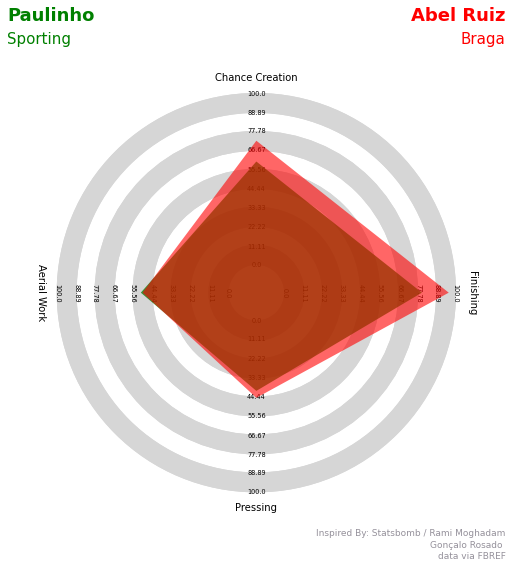

In [308]:
radar_plot(p1="Paulinho",p2="Abel Ruiz",c1='green',c2='red',cl1='Sporting',cl2='Braga')